# <center> Devoir Maison \#1 - MAP 433 </center>

## Trinôme:
#### BARRÉ Théo
#### CHEN Longteng
#### COSTA ALVES FREIRE Bruno

## 2. Partie Pratique

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from IPython.display import display, Latex
import warnings
warnings.filterwarnings('ignore')

file = "ozone_complet.txt"
données = pd.read_csv(file, delimiter=';').dropna()

ozone = données["maxO3"] 
temperature, vent, nebulosite = données["T12"], données["Vx"], données["Ne12"]
intercept = pd.Series(data = np.ones(ozone.size), index = ozone.index)

### 1.  Estimer l’estimateur des moindres carrés du paramètre

In [2]:
Y = np.matrix(ozone).transpose()
Zt = np.matrix((intercept, temperature, vent, nebulosite))
Z = Zt.transpose()

β_hat = np.linalg.solve(Zt*Z, Zt*Y)

dof = Z.shape[0] - Z.shape[1]

σ2_hat = np.linalg.norm(Y - Z*β_hat)**2/dof

print("Intercept: ")
display(Latex(f"$\\hat{{\\beta}}_0 = {β_hat.item(0):.4f}$"))
print("Coefficient de Température: ")
display(Latex(f"$\\hat{{\\beta}}_1 = {β_hat.item(1):.4f}$"))
print("Coefficient de Vent: ")
display(Latex(f"$\\hat{{\\beta}}_2 = {β_hat.item(2):.4f}$"))
print("Coefficient de Nébulosité: ")
display(Latex(f"$\\hat{{\\beta}}_3 = {β_hat.item(3):.4f}$"))
print("Variance: ")
display(Latex(f"$\\hat{{\\sigma}}^2 = {σ2_hat.item(0):.4f}$"))

Intercept: 


<IPython.core.display.Latex object>

Coefficient de Température: 


<IPython.core.display.Latex object>

Coefficient de Vent: 


<IPython.core.display.Latex object>

Coefficient de Nébulosité: 


<IPython.core.display.Latex object>

Variance: 


<IPython.core.display.Latex object>

### 2.  Déterminer les intervalles de confiance bilatères à $95\%$ pour chaque valeur des paramètres

In [3]:
α = 0.05

Σ = np.linalg.inv(Zt*Z)

interv = np.array(β_hat + np.sqrt(σ2_hat * np.diag(Σ).reshape((4,1))) * sps.t(df=dof).ppf((α/2, 1-α/2)))

display(Latex("Intervalles de Confiance Bilatères à $95\\%$: "))
print("Intercept: ")
display(Latex(f"$\\mathbb{{P}}_{{\\theta}}[\\beta_0 \\in [{interv[0][0]:.4f}, {interv[0][1]:.4f}]] = 95\\% $"))
print("Coefficient de Température: ")
display(Latex(f"$\\mathbb{{P}}_{{\\theta}}[\\beta_1 \\in [{interv[1][0]:.4f}, {interv[1][1]:.4f}]] = 95\\% $"))
print("Coefficient de Vent: ")
display(Latex(f"$\\mathbb{{P}}_{{\\theta}}[\\beta_2 \\in [{interv[2][0]:.4f}, {interv[2][1]:.4f}]] = 95\\% $"))
print("Coefficient de Nébulosité: ")
display(Latex(f"$\\mathbb{{P}}_{{\\theta}}[\\beta_3 \\in [{interv[3][0]:.4f}, {interv[3][1]:.4f}]] = 95\\% $"))

<IPython.core.display.Latex object>

Intercept: 


<IPython.core.display.Latex object>

Coefficient de Température: 


<IPython.core.display.Latex object>

Coefficient de Vent: 


<IPython.core.display.Latex object>

Coefficient de Nébulosité: 


<IPython.core.display.Latex object>

### 3.  Visualiser les régions de confiance à $95\%$ pour $(\beta_1, \beta_2)$ et $(\beta_1, \beta_3)$

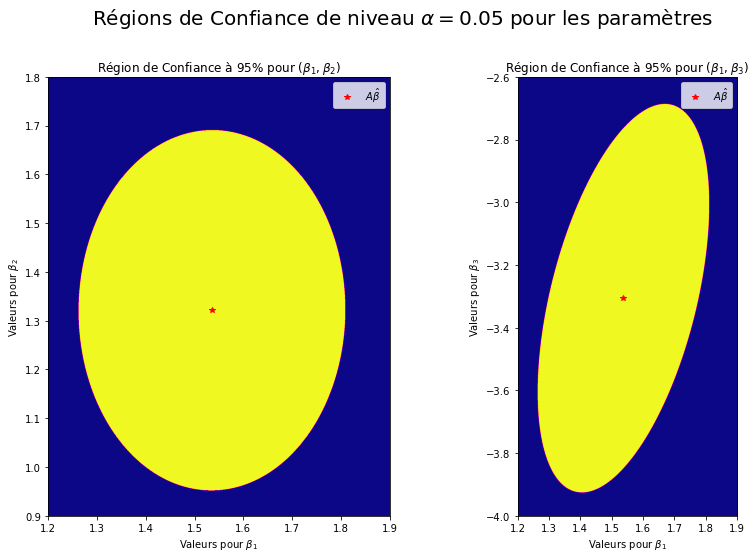

In [4]:
q = 2
F = sps.f.ppf(1-α, q, dof)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharey=False)

title = [r"$(\beta_1, \beta_2)$", r"$(\beta_1, \beta_3)$"]
matrices = list([np.matrix([[0, 1, 0, 0], [0, 0, 1, 0]]), np.matrix([[0, 1, 0, 0], [0, 0, 0, 1]])])
vecteurs = [lambda x,y: np.matrix([[0, x, y, 0]]).transpose(), lambda x,y: np.matrix([[0, x, 0, y]]).transpose()]
xframe = [np.linspace(1.2,1.9,1400), np.linspace(1.2,1.9,1400)]
yframe = [np.linspace(.9,1.8,1400), np.linspace(-4,-2.6,2800)]
xlabel = [r"Valeurs pour $\beta_1$", r"Valeurs pour $\beta_1$"]
ylabel = [r"Valeurs pour $\beta_2$", r"Valeurs pour $\beta_3$"]
for i, ax in enumerate(axs.ravel()):
    A = matrices[i]
    region = lambda v,M: ((A*(β_hat - v)).transpose()*M*(A*(β_hat - v))).item(0)

    M = np.linalg.inv(A*Σ*A.transpose())/(q*σ2_hat)

    x,y = np.meshgrid(xframe[i],yframe[i])
    v = vecteurs[i](x,y)

    ax.title.set_text(r"Région de Confiance à $95\%$ pour "+title[i])
    ax.imshow( (region(v, M) <= F).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", 
              cmap = 'plasma')

    center = np.asarray(A*β_hat).reshape(2)
    ax.plot(center[0], center[1], 'r*')
    ax.legend([r"$A \hat{\beta}$"])
    ax.set_xlabel(xlabel[i])
    ax.set_ylabel(ylabel[i])

plt.suptitle(r"Régions de Confiance de niveau $\alpha = $"+f"{α} pour les paramètres", fontsize=20)
plt.tight_layout(pad=2)
plt.show()

### 4. Formuler les différentes questions comme des tests d’hypothèses

1. est-ce que la valeur de ```O3``` est influencée par ```Vx``` ?

    $$H_0 : \beta_2 = 0~, ~~~\text{ contre }~~~ H_1 : \beta_2 \neq 0$$
    
    
    
2. y a-t-il un effet nébulosité ?

    $$H_0 : \beta_3 = 0~, ~~~\text{ contre }~~~ H_1 : \beta_3 \neq 0$$
    
    
    
3. est-ce que la valeur de ```O3``` est influencée par ```Vx``` ou ```T12``` ?

    $$H_0 : (\beta_1, \beta_2) = (0, 0)~, ~~~\text{ contre }~~~ H_1 : (\beta_1, \beta_2) \neq (0, 0)$$




### 5. Construire des procédures de tests pour ces trois hypothèses

1. On rejette $H_0$ si et seulement si la statistique de test $T = \dfrac{\mathbf{x}^T \mathbf{\hat{\beta}}}{\hat{\sigma}\sqrt{\mathbf{x}^T(\mathbf{Z}^T \mathbf{Z})^{-1} \mathbf{x}}}$ est plus grande en valeur absolue que le quantile $t_{n-p}(1-\alpha/2)$. 

Dans ce cas, $\mathbf{x} = [0, 0, 1, 0]^T$. 

In [8]:
T = np.abs(β_hat.item(2) / (np.sqrt(σ2_hat * np.diag(Σ).reshape((4,1))).item(2)))
t = sps.t(df=dof).ppf(1-α/2)

display(Latex(f"$T = {T:.4f} {'>' if T > t else '<'} {t:.4f} = t_{{n-p}}(1-\\alpha/2)$"))
display(Latex("Alors, on rejette l'hypothèse nulle. " if T > t else 
              "Alors, on ne rejette pas $H_0$."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2. On rejette $H_0$ si et seulement si la statistique de test $T = \dfrac{\mathbf{x}^T \mathbf{\hat{\beta}}}{\hat{\sigma}\sqrt{\mathbf{x}^T(\mathbf{Z}^T \mathbf{Z})^{-1} \mathbf{x}}}$ est plus grande en valeur absolue que le quantile $t_{n-p}(1-\alpha/2)$. 

Dans ce cas, $\mathbf{x} = [0, 0, 0, 1]^T$. 

In [9]:
T = np.abs(β_hat.item(3) / (np.sqrt(σ2_hat * np.diag(Σ).reshape((4,1))).item(3)))
t = sps.t(df=dof).ppf(1-α/2)

display(Latex(f"$T = {T:.4f} {'>' if T > t else '<'} {t:.4f} = t_{{n-p}}(1-\\alpha/2)$"))
display(Latex("Alors, on rejette l'hypothèse nulle. " if T > t else 
              "Alors, on ne rejette pas $H_0$."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

3. On rejette $H_0$ si et seulement si la statistique de test $F = \dfrac{1}{q \hat{\sigma}^2} \hat{\beta}^T [A^T A(\mathbf{Z}^T\mathbf{Z})^{-1}A^T A] \hat{\beta}$ est plus grande que le quantile $f_{q, n-p}(1-\alpha)$. 

Dans ce cas, $A = \begin{bmatrix}0&1&0&0\\0&0&1&0 \end{bmatrix}$. 

In [10]:
q = 2
f = sps.f.ppf(1-α, q, dof)
A = np.matrix([[0, 1, 0, 0], [0, 0, 1, 0]])
M = np.linalg.inv(A*Σ*A.transpose())/(q*σ2_hat)

F = ((A*β_hat).transpose()*M*(A*β_hat)).item(0)


display(Latex(f"$F = {F:.4f} {'>' if F > f else '<'} {f:.4f} = f_{{q, n-p}}(1-\\alpha)$"))
display(Latex("Alors, on rejette l'hypothèse nulle. " if F > f else 
              "Alors, on ne rejette pas $H_0$."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 6. Conclure

En conclusion, puisque dans chacun des tests on a rejetté l'hypothèse nulle, il est raisonnable d'affirmer que 
1. Oui, la valeur de ```O3``` semble bien être influencée par ```Vx```; 
2. Oui, il y a bien un effet de la nébulosité sur ```O3```; 
3. Et finalement, oui, ```O3``` est bien influencée par le couple ```Vx```, ```T12```. 